# PyTorch. Линейная регрессия

## 1. Подготовка данных

Сгенерируем данные для задачи регрессии с помощью sklearn.

In [ ]:
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=1000, n_features=20)
x

array([[ 1.25561929,  0.1251996 , -1.0600097 , ..., -0.21086421,
         0.57053637,  0.34983458],
       [ 0.29500551, -2.04370236, -0.13441126, ..., -0.27961382,
        -1.43098576, -1.04676305],
       [ 0.61128428,  1.39280526, -0.19311691, ..., -1.37940473,
         0.01943618, -0.02308851],
       ...,
       [ 0.13316848,  0.24908842, -0.62768632, ..., -0.61729096,
         0.76252273, -0.80897595],
       [ 1.97269268, -0.41607196,  0.01355337, ...,  0.13332111,
        -0.19705652, -2.25775323],
       [-0.15510878,  0.67329293, -0.88394331, ..., -0.71425675,
        -0.45320677,  0.3807518 ]])

In [ ]:
y

array([-9.26322059e+01, -1.04792270e+02,  1.64493625e+02, -4.52766366e+02,
        1.90818836e+02, -2.42524216e+02,  1.66231227e+02, -2.31647113e+01,
       -9.57512825e+01, -2.47860237e+01, -2.45499515e+02, -2.72763179e+02,
       -1.56502737e+02,  2.00436864e+02,  1.29642366e+01, -2.17663727e+02,
       -8.26754304e+00, -1.66785083e+02, -2.79661850e+02, -4.90611785e+02,
       -4.60419677e+01,  3.36476007e+02,  3.09553928e+02,  1.68276018e+02,
       -3.25256741e+01,  1.25556808e+02,  1.79532026e+02, -9.12888310e+00,
       -2.53938087e+02, -1.60926977e+02, -1.42617753e+02, -1.24016404e+02,
        5.58357809e+01, -1.55751160e+02,  4.91803714e+01, -1.43021973e+02,
       -1.15789782e+02, -1.80219693e+01, -2.81251325e+02,  1.32402409e+02,
        1.05554014e+01,  5.13059792e+01,  3.69274089e+00,  3.52852882e+00,
       -6.93719208e+01,  2.56885120e+02, -1.39329881e+02, -1.89257696e+02,
       -8.13358448e+01,  3.09010270e+01,  1.89542049e+02, -1.14471706e+02,
        2.47762535e+02,  

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
import torch
from torch import nn, optim

Преобразуем данные в тензоры.

In [ ]:
x_train_tensor = torch.from_numpy(x_train)
y_train_tensor = torch.from_numpy(y_train).unsqueeze(1)

x_test_tensor = torch.from_numpy(x_test)
y_test_tensor = torch.from_numpy(y_test).unsqueeze(1)

In [ ]:
x_train_tensor

tensor([[ 1.1533, -0.0575,  0.0659,  ..., -1.0222, -0.9420, -0.2940],
        [ 1.2505,  0.2178, -0.8975,  ...,  1.2363, -1.0616,  0.2593],
        [-1.4963, -1.0516, -0.5127,  ...,  1.4052,  0.3567,  0.5700],
        ...,
        [ 1.1019,  0.5915,  0.1358,  ..., -0.7711, -0.2528, -1.6856],
        [-0.2378,  0.7791,  0.4497,  ...,  0.0821, -1.1452,  0.5527],
        [ 0.5756,  1.3643, -2.1352,  ...,  2.5514,  2.0833,  0.8997]],
       dtype=torch.float64)

In [ ]:
y_train_tensor

tensor([[ 1.1171e+02],
        [-1.0534e+02],
        [ 1.5597e+02],
        [ 2.3953e+02],
        [-6.5913e+01],
        [-2.6458e+02],
        [ 1.6271e+02],
        [-6.4810e+01],
        [-2.7971e+01],
        [ 5.0253e+01],
        [-1.1957e+01],
        [-1.5879e+02],
        [-9.8213e+01],
        [ 4.1651e+02],
        [-2.2654e+01],
        [-2.7872e+02],
        [-2.0945e+02],
        [-1.4665e+02],
        [ 2.4295e+02],
        [-8.0791e+01],
        [ 3.7058e+01],
        [-1.5650e+02],
        [ 2.2190e+02],
        [-4.0692e+02],
        [-1.7755e+02],
        [ 1.7399e+02],
        [-3.4128e+02],
        [-4.3233e+02],
        [ 1.8932e+02],
        [ 3.6597e+02],
        [-2.9519e+02],
        [-9.3029e+00],
        [ 2.9452e+02],
        [-4.4980e+02],
        [-5.3371e+01],
        [-5.3291e+01],
        [ 9.9237e+01],
        [-2.3184e+02],
        [-1.1901e+02],
        [-1.4044e+02],
        [ 1.1679e+01],
        [-2.9489e+02],
        [-1.0701e+02],
        [-5

## 2. Обучение линейной регрессии

Создадим модель, состоящую из одного линейного слоя. Количество входов линейного слоя равно количеству признаков в данных.

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self, input_layers, output_layers):
        super(LinearRegression, self).__init__()
        self.layer = nn.Linear(input_layers, output_layers, bias=True).to(torch.double)

    def forward(self, x):
        return self.layer(x)

In [ ]:
def create_neural_network():
    return LinearRegression(x_train_tensor.shape[1], 1)

Подготовим метод для обучения модели.

В качестве метрики будем использовать MSE, для обучения модели будем использовать стохастический градиентный спуск с уменьшением шага на плато.

In [ ]:
loss_fn = nn.MSELoss(reduction='sum')

def train(x, y, n_epochs, learning_rate):
    neural_network = create_neural_network()

    optimizer = optim.SGD(neural_network.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)

    for epoch in range(n_epochs):
        neural_network.train()

        prediction = neural_network(x)
        loss = loss_fn(y, prediction)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        scheduler.step(loss)
    
    return neural_network

In [ ]:
def predict(neural_network, data):
    with torch.no_grad():
        neural_network.eval()
        prediction = neural_network(data)
        return prediction

Обучим модель.

In [ ]:
trained_model = train(x_train_tensor, y_train_tensor, n_epochs=1000, learning_rate=0.0001)
trained_model

LinearRegression(
  (layer): Linear(in_features=20, out_features=1, bias=True)
)

Вычислим прогнозы на обучающей и тестовой выборках.

In [ ]:
prediction_train = predict(trained_model, x_train_tensor)
prediction_test = predict(trained_model, x_test_tensor)
prediction_test

tensor([[-1.3330e+02],
        [ 4.0196e+01],
        [ 5.5883e+01],
        [-1.6925e+01],
        [ 3.3973e+02],
        [ 2.4734e+02],
        [ 5.6585e+01],
        [ 1.2110e+02],
        [ 2.6884e+02],
        [ 6.6173e+01],
        [-3.6784e+02],
        [-1.9403e+02],
        [-1.4471e+02],
        [-1.1228e+02],
        [-1.6382e+02],
        [-9.8557e+01],
        [-6.6308e+01],
        [-1.2452e+02],
        [-1.2402e+02],
        [-1.5525e+02],
        [ 2.3223e+02],
        [ 2.3174e+02],
        [-2.0246e+02],
        [-3.0717e+02],
        [-2.2596e+01],
        [ 1.7426e+02],
        [-5.5702e+01],
        [-8.8558e+01],
        [ 1.8537e+01],
        [ 3.0240e+02],
        [-2.0262e+01],
        [-3.2526e+01],
        [ 1.0219e+02],
        [ 1.4817e+02],
        [ 2.0006e+02],
        [-4.5564e+01],
        [-1.7500e+02],
        [-1.3963e+02],
        [-1.3536e+02],
        [ 2.4024e+01],
        [ 8.5316e+01],
        [-1.7016e+00],
        [-6.0985e+00],
        [ 8

Вычислим MSE на обучающей и тестовой выборках.

Значение ошибки очень мало, это значит, что модель очень успешно обучилась.

In [ ]:
loss_fn(y_train_tensor, prediction_train)

tensor(5.9682e-24, dtype=torch.float64)

In [ ]:
loss_fn(y_test_tensor, prediction_test)

tensor(1.7364e-24, dtype=torch.float64)

Видно, что качество модели получилось очень высоким, для всех точек значения прогноза практически равны истинным значениям.

Text(0, 0.5, 'Предсказанная целевая переменная')

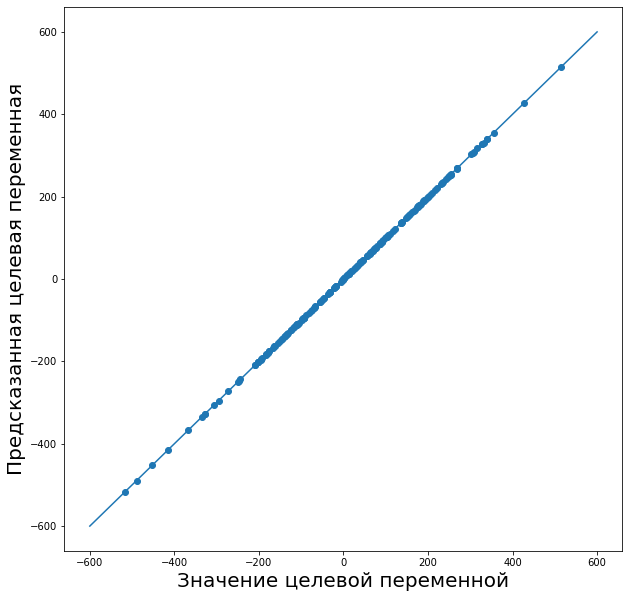

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(y_test_tensor, prediction_test)
plt.plot([-600, 600], [-600, 600])
plt.xlabel('Значение целевой переменной', fontsize=20)
plt.ylabel('Предсказанная целевая переменная', fontsize=20)